## Prediction of the most impactful ad by Upper Confidence Bound Algorithm

In [1]:
# At first, making all the necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
# Implement UCB
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0]*d
sum_of_rewards = [0]*d
total_rewards = 0

In [10]:
for n in range (0, N):
    ad = 0
    max_upper_bound = 0
    for i in range (0, d):
        if (numbers_of_selections[i] > 0):
            avg = sum_of_rewards[i]/numbers_of_selections[i]
            delta_i = math.sqrt(1.5 * math.log(n+1)/numbers_of_selections[i])
            upper_bound = avg + delta_i
        else:
            upper_bound = 1e400
        
        if max_upper_bound < upper_bound:
            max_upper_bound = upper_bound
            ad = i
        
        ads_selected.append(ad)
        numbers_of_selections[ad] += 1
        reward = data.values[n, ad]
        sum_of_rewards[ad] += reward
        total_rewards += reward

Text(0, 0.5, 'Number of times each add was selected')

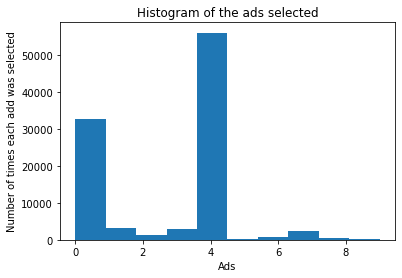

In [13]:
# Visualize the results
plt.hist(ads_selected)
plt.title("Histogram of the ads selected")
plt.xlabel("Ads")
plt.ylabel("Number of times each add was selected")

In [14]:
# So here, it is visible that ad 4 was selected maximum number of times
# Therefore, ad 4 is the best one
# If we reduce the number of rounds, we get the same result, but after a particular threshold, 4 starts losing, results are not that good